importe

In [85]:
import pandas as pd
from geopy.geocoders import Nominatim #Geokodierung, Nominatim-> OpenStreetMap(Koordinaten)
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
import pycountry

Funktion erstellen (für functions-Ordner/ alle)
- aus dem Ufo-Datensatz longitude und latitude ziehen
- städte und länder ziehen
- neue spalte /alte ersetzen

ufo-Datensatz laden

In [86]:
ufo_path = (r"C:\Users\Admin\Documents\Projekt_Ufo\Projekt_UFO\data\data_clean\ufo_sightings_scrubbed_clean.csv") # ufodaten laden
ufo_df = pd.read_csv(ufo_path)

Land aus Long und Lat ziehen und an df anhängen

In [87]:
# UFO-Datensatz in einen GeoDataFrame (gdf) umwandeln
ufo_df['geometry'] = ufo_df.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1) # neue spalte erstellen, die long und lat kombiniert (gdf)
ufo_gdf = gpd.GeoDataFrame(ufo_df, geometry='geometry', crs="EPSG:4326") # df in gdf umwandeln

# Weltkarte laden
world = gpd.read_file(r"C:\Users\Admin\Documents\Projekt_Ufo\Projekt_UFO\data\shapes_from_natural_earth\ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp")
world = world.to_crs("EPSG:4326")  # gdf erstellen und mit Koordinatenreferenzsystem (CRS) verbinden (ist so :D)

# Räumliche Verknüpfung durchführen
joined_gdf = gpd.sjoin(ufo_gdf, world, how="left", predicate="within") # statt .apply von df/pandas

# Ländernamen extrahieren und dem ursprünglichen DataFrame hinzufügen
ufo_df['geo_country'] = joined_gdf['NAME']

# Ergebnis anzeigen
print(ufo_df.head())

              datetime                  city state country     shape  \
0  1949-10-10 20:30:00            san marcos    tx      us  cylinder   
1  1949-10-10 21:00:00          lackland afb    tx     NaN     light   
2  1955-10-10 17:00:00  chester (uk/england)   NaN      gb    circle   
3  1956-10-10 21:00:00                  edna    tx      us    circle   
4  1960-10-10 20:00:00               kaneohe    hi      us     light   

   duration_seconds duration_hour_min  \
0              2700        45 minutes   
1              7200           1-2 hrs   
2                20        20 seconds   
3                20          1/2 hour   
4               900        15 minutes   

                                            comments date_posted   latitude  \
0  This event took place in early fall around 194...  2004-04-27  29.883056   
1  1949 Lackland AFB, TX.  Lights racing across t...  2005-12-16  29.384210   
2   Green/Orange circular disc over Chester, England  2008-01-21  53.200000   
3  M

In [88]:
### laura to do -> länderdaten an neues df anpassen -> grafiken neu laden

codes und grafiken zu fragen:
- welche shapes in welchen ländern (wie lange)

In [89]:
# amerika ziehen

ufo_usa = ufo_df[ufo_df["geo_country"] == "United States of America"]

shape_per_country = ufo_usa.groupby('shape').size().reset_index(name='count')

shapes_usa = shape_per_country.sort_values("count", ascending=False).head(10)

print(shapes_usa)

#sortierung nach häufigkeit
# davon top 10 head(10)

        shape  count
19      light  14360
27   triangle   6978
4      circle   6434
14   fireball   5447
28    unknown   4889
20      other   4834
25     sphere   4645
11       disk   4453
21       oval   3236
17  formation   2118


C:\Users\Admin\AppData\Local\Temp\ipykernel_13964\2486787386.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_shape_per_country, x='count', y='shape', palette='viridis')


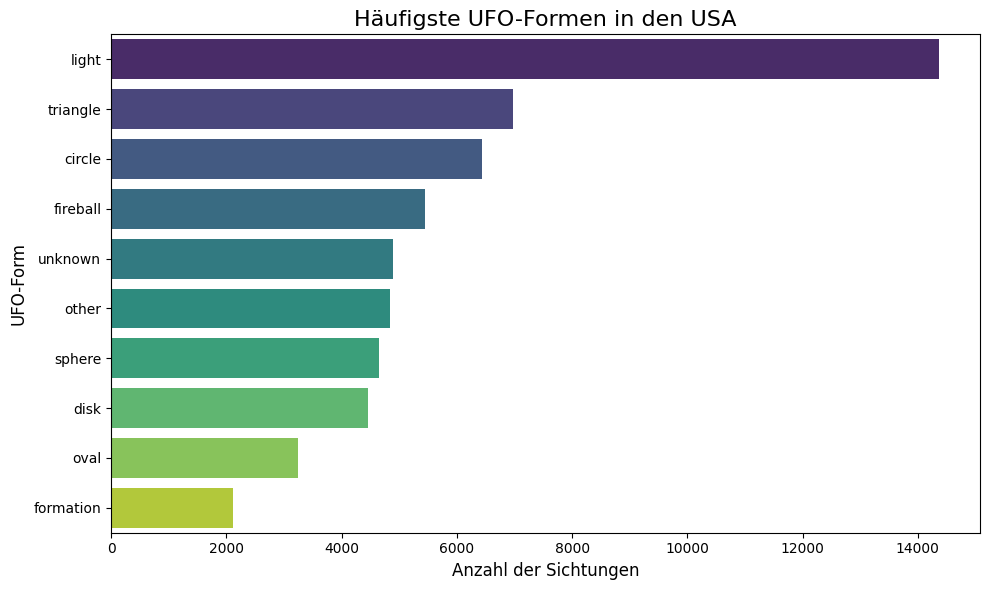

In [ ]:
# Grafik
plt.figure(figsize=(10, 6))  # Größe des Diagramms
sns.barplot(data=shape_per_country, x='count', y='shape', palette='viridis')
plt.title('Häufigste UFO-Formen in den USA', fontsize=16)
plt.xlabel('Anzahl der Sichtungen', fontsize=12)
plt.ylabel('UFO-Form', fontsize=12)
plt.tight_layout()
plt.show()

In [91]:
# Deutschland ziehen

ufo_germany = ufo_df[ufo_df["geo_country"] == "Germany"]

shape_per_country = ufo_germany.groupby('shape').size().reset_index(name='count')

shapes_germany = shape_per_country.sort_values("count", ascending=False).head(10)

print(shapes_germany)

       shape  count
11     light     28
3     circle     14
12     other     12
8   fireball     10
16  triangle     10
13      oval      9
6       disk      9
15    sphere      9
17   unknown      8
4   cylinder      5


C:\Users\Admin\AppData\Local\Temp\ipykernel_13964\4025803447.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=shapes_germany, x='count', y='shape', palette='viridis')


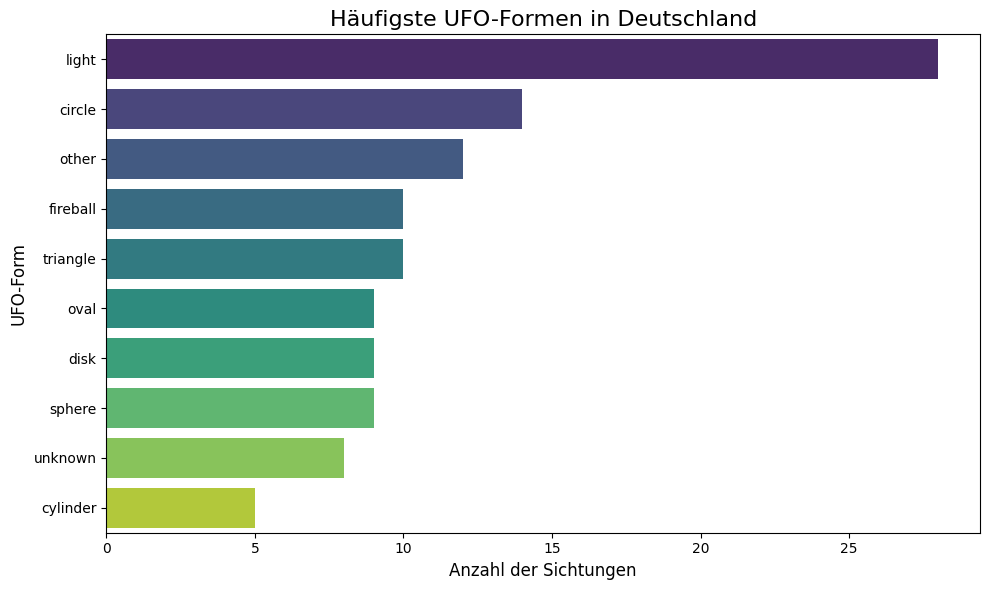

In [92]:
# Grafik
plt.figure(figsize=(10, 6))  # Größe des Diagramms
sns.barplot(data=shapes_germany, x='count', y='shape', palette='viridis')
plt.title('Häufigste UFO-Formen in Deutschland', fontsize=16)
plt.xlabel('Anzahl der Sichtungen', fontsize=12)
plt.ylabel('UFO-Form', fontsize=12)
plt.tight_layout()
plt.show()

In [93]:
#häufigste shapes pro jahre
#-> usa und germany

In [94]:
#lauras funktion -> kann später raus, wenn du funktikonen für alle gehen

# Zeile datetime in Datetime-Format umwandeln
def clean_datetime_column(df, datetime_column="datetime"):
    datetime_clean = pd.to_datetime(df[datetime_column], format="mixed", errors="coerce")
    return datetime_clean

In [95]:
#saubere datetime ziehen
ufo_df["datetime_clean"] = clean_datetime_column(ufo_df, "datetime")

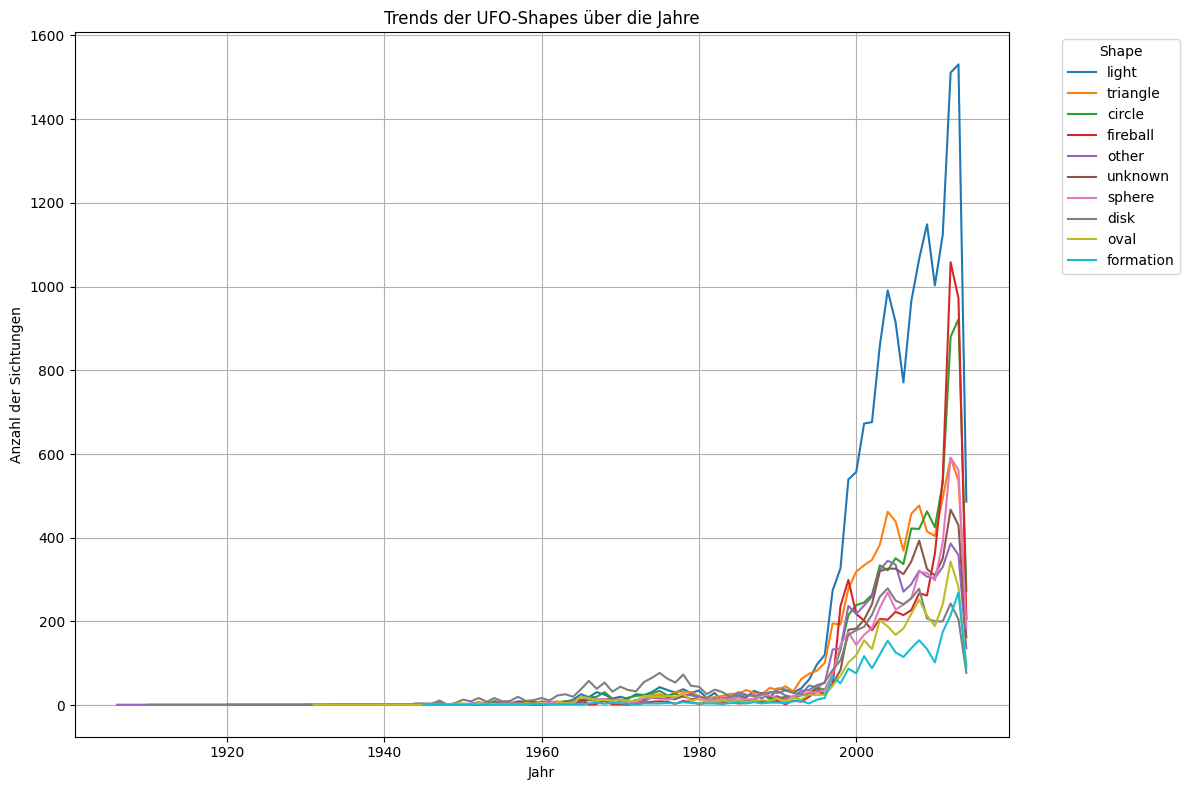

In [96]:

#jahre ziehen (alle)
# shapes ziehen -> count davon 

# Jahr extrahieren
ufo_df["year"] = ufo_df["datetime_clean"].dt.year

# Gruppieren nach Jahr und Shape und zählen
shapes_per_year = ufo_df.groupby(["year", "shape"]).size().reset_index(name="count")

top_shapes = ufo_df["shape"].value_counts().head(10).index
shapes_per_year = ufo_df[ufo_df["shape"].isin(top_shapes)].groupby(["year", "shape"]).size().reset_index(name="count")

# Pivot-Tabelle erstellen, um Shapes über die Jahre zu vergleichen
pivot_table = shapes_per_year.pivot(index="year", columns="shape", values="count").fillna(0)

# Visualisierung
plt.figure(figsize=(12, 8))
for shape in top_shapes:
    subset = shapes_per_year[shapes_per_year["shape"] == shape]
    plt.plot(subset["year"], subset["count"], label=shape)

plt.title("Trends der UFO-Shapes über die Jahre")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Sichtungen")
plt.legend(title="Shape", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

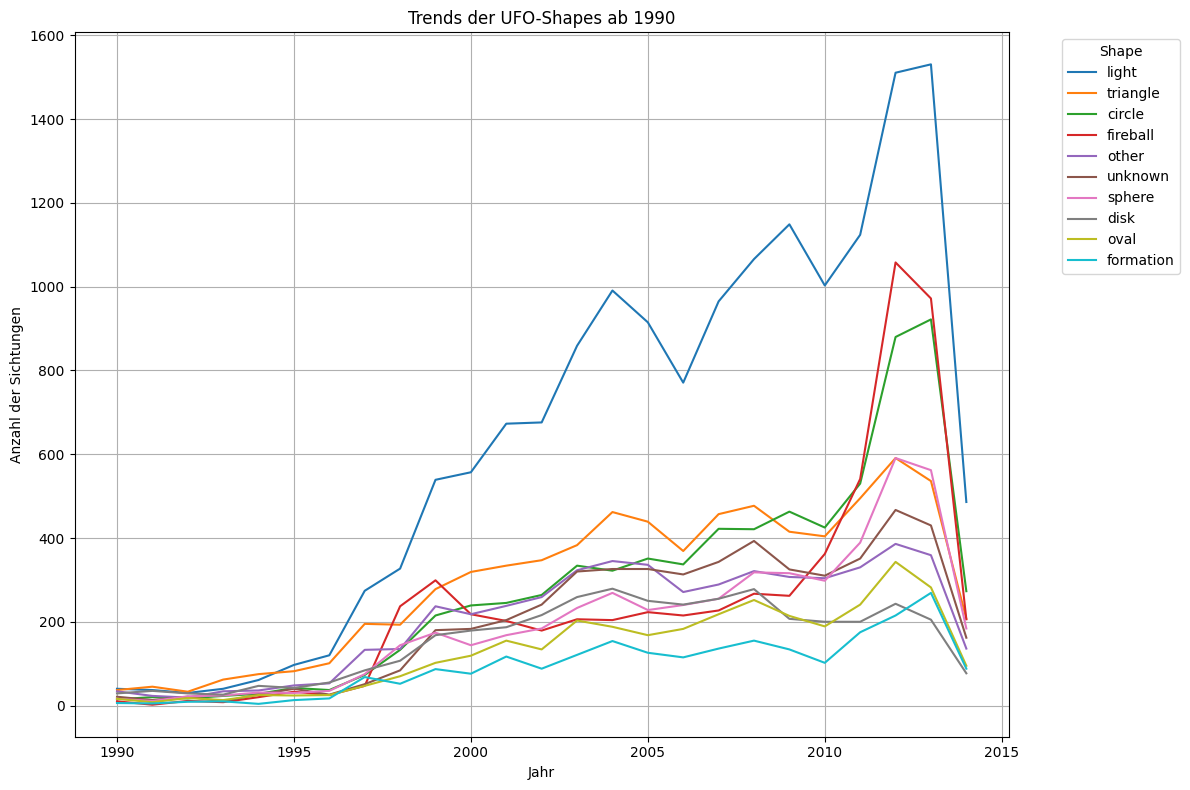

In [101]:
# jahre ziehen ab 1990


# Jahr extrahieren
ufo_df["year"] = ufo_df["datetime_clean"].dt.year
close_up_df = ufo_df[ufo_df["year"] >= 1990]

# Gruppieren nach Jahr und Shape und zählen
shapes_per_year = close_up_df.groupby(["year", "shape"]).size().reset_index(name="count")

top_shapes = close_up_df["shape"].value_counts().head(10).index
shapes_per_year = close_up_df[close_up_df["shape"].isin(top_shapes)].groupby(["year", "shape"]).size().reset_index(name="count")

# Pivot-Tabelle erstellen, um Shapes über die Jahre zu vergleichen
pivot_table = shapes_per_year.pivot(index="year", columns="shape", values="count").fillna(0)

# Visualisierung
plt.figure(figsize=(12, 8))
for shape in top_shapes:
    subset = shapes_per_year[shapes_per_year["shape"] == shape]
    plt.plot(subset["year"], subset["count"], label=shape)

plt.title("Trends der UFO-Shapes ab 1990")
plt.xlabel("Jahr")
plt.ylabel("Anzahl der Sichtungen")
plt.legend(title="Shape", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()